# Meent Tutorial for NumPy

In [48]:
import time

import matplotlib.pyplot as plt
import numpy as np

import meent

In [91]:
# common
pol = 0  # 0: TE, 1: TM

n_I = 1  # n_incidence
n_II = 1  # n_transmission

theta = 20 * np.pi / 180
phi = 50 * np.pi / 180

wavelength = 900

thickness = [500]
period = [1000]

fourier_order = [30]

type_complex = np.complex128

grating_type = 0

# Modeling

In [84]:
ucell_1d = np.array([
    [
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ],
    ],
]) * 4 + 1  # refractive index

ucell (unit cell) is a 3-dimensional array which has refractive index elements. It supports complex index, 2-dimensional grating and multi-layered structures.

The order of dimensions: Z Y X.

Z: Height of the structure
homogenous in each layer. ucell[0, :, :] means the top layer which directly encounters the incident wave.

Y: Depth of the structure



In [85]:
mee = meent.call_mee(backend=0, grating_type=grating_type, pol=pol, n_I=n_I, n_II=n_II, theta=theta, phi=phi, fourier_order=fourier_order, wavelength=wavelength, period=period, ucell=ucell_1d, thickness=thickness, type_complex=type_complex, fft_type=0, improve_dft=True)

# EM Simulation

## Diffraction Efficiency

In [86]:
t0 = time.time()
de_ri, de_ti = mee.conv_solve()
print(f'time: ', time.time() - t0)

time:  0.014650821685791016


In [87]:
center = de_ri.shape[0] // 2

print('Diffraction Efficiency of Reflection:', np.round(de_ri[center-1:center+2], 3))
print('Diffraction Efficiency of Transmission:', np.round(de_ti[center-1:center+2], 3))

Diffraction Efficiency of Reflection: [0.    0.803 0.   ]
Diffraction Efficiency of Transmission: [0.    0.197 0.   ]


## Field Distribution

In [88]:
resolution = (100, 1, 100)

t0 = time.time()
field_cell = mee.calculate_field(resolution=resolution, plot=False)
print(f'time: ', time.time() - t0)

time:  0.09271407127380371


### ZX direction (Side View)

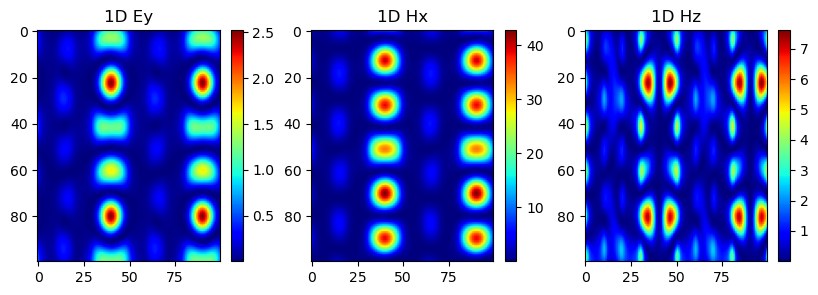

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
if pol == 0:  # TE
    title = ['1D Ey', '1D Hx', '1D Hz', ]
else:  # TM
    title = ['1D Hy', '1D Ex', '1D Ez', ]

for ix in range(len(title)):
    val = abs(field_cell[:, 0, :, ix]) ** 2
    im = axes[ix].imshow(val, cmap='jet', aspect='auto')
    # plt.clim(0, 2)  # identical to caxis([-4,4]) in MATLAB
    fig.colorbar(im, ax=axes[ix], shrink=1)
    axes[ix].title.set_text(title[ix])

plt.show()

### YZ Direction (Top View)

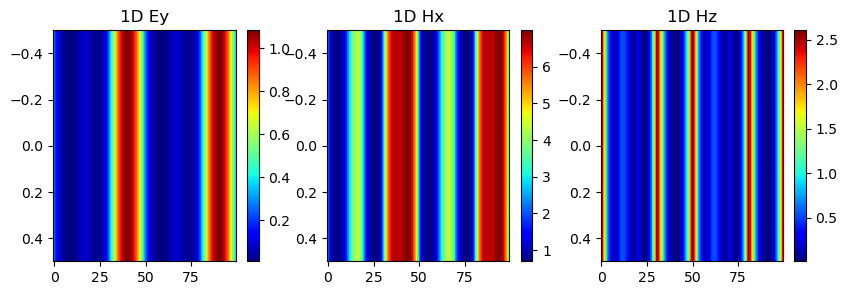

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
if pol == 0:  # TE
    title = ['1D Ey', '1D Hx', '1D Hz', ]
else:  # TM
    title = ['1D Hy', '1D Ex', '1D Ez', ]

for ix in range(len(title)):
    val = abs(field_cell[0, :, :, ix]) ** 2
    im = axes[ix].imshow(val, cmap='jet', aspect='auto')
    # plt.clim(0, 2)  # identical to caxis([-4,4]) in MATLAB
    fig.colorbar(im, ax=axes[ix], shrink=1)
    axes[ix].title.set_text(title[ix])

plt.show()

# Optimization
Optimization is not supported with NumPy.

Please use Meent on JAX or Meent on PyTorch.